In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from config import *
TPU_MODE=False

import dataset_functions
import dataset_builder


In [3]:
tfrecord_files_train,tfrecord_files_val=dataset_builder.get_tfrecord_filenames(permissive=True)
print("Found the following TFrecords:\n","\n".join(tfrecord_files_train),"\n", "\n".join(tfrecord_files_val))

TF_parser = dataset_functions.TFrecordParser()
ds = tf.data.TFRecordDataset(tfrecord_files_train)  # numf reads can be put here, but I don't think I/O is the bottleneck

# raw format to imgs,tensors(coords kpts)
ds = ds.map(TF_parser.read_tfrecord)
ds = ds.map(dataset_functions.make_label_tensors)
# imgs,label_tensors arrange for model outputs
ds = ds.map(dataset_functions.place_training_labels)
ds = ds.batch(2)

Retrieving TFrecords in local mode
Found the following TFrecords:
 .\dataset\TFrecords\training-001.tfrecords
.\dataset\TFrecords\training-002.tfrecords
.\dataset\TFrecords\training-003.tfrecords
.\dataset\TFrecords\training-004.tfrecords 
 


In [4]:
print(ds)
it=iter(ds)

<BatchDataset shapes: ((None, 368, 368, 3), ((None, 46, 46, 38), (None, 46, 46, 38), (None, 46, 46, 38), (None, 46, 46, 38), (None, 46, 46, 17), (None, 46, 46, 17)), (None, 46, 46)), types: (tf.float32, (tf.float32, tf.float32, tf.float32, tf.float32, tf.float32, tf.float32), tf.float32)>


In [9]:
st=next(it)

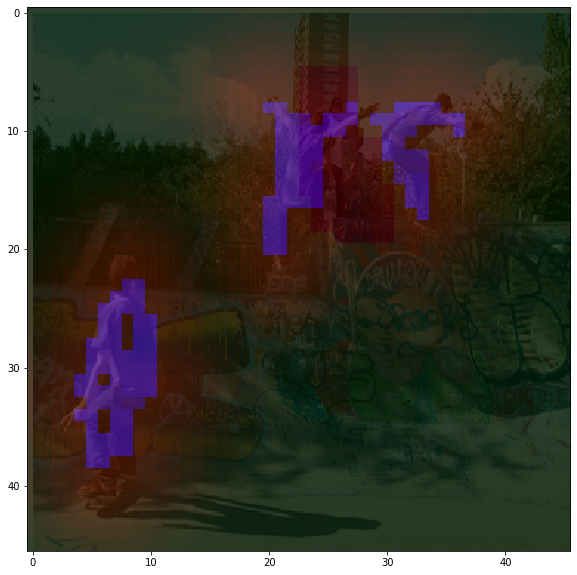

In [11]:
img=st[0][0]
mask=st[2][0]
kpts=st[1][5][0].numpy()
pafs=st[1][0][0].numpy()
z=np.zeros_like(mask)
o=np.ones_like(mask)
mask_4ch=np.stack([z,mask,z,o*0.3],axis=-1)

kpts_sum=kpts.max(axis=-1)
kpts_sum_4ch=np.stack([kpts_sum,z,z,o*0.5],axis=-1)

pafs_sum=abs(pafs).max(axis=-1)
pafs_sum_4ch=np.stack([z,z,pafs_sum,o*0.5],axis=-1)

plt.figure(1,(10,10))
plt.imshow(img,extent=(0,46,46,0))
plt.imshow(mask_4ch)
plt.imshow(kpts_sum_4ch)
plt.imshow(pafs_sum_4ch)

In [12]:
#plt.imshow(img)
#plt.imshow(kpts_sum)

